In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Add this line
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 1000
sku = np.random.randint(1, 101, size=num_samples)
price = np.random.uniform(5, 100, size=num_samples)
category = np.random.choice(['Electronics', 'Clothing', 'Books'], size=num_samples)
inventory = np.random.randint(0, 100, size=num_samples)
ratings = np.random.uniform(1, 5, size=num_samples)
other_feature1 = np.random.randn(num_samples)
other_feature2 = np.random.exponential(scale=2, size=num_samples)

# Simulate a relationship between features and sales
sales = 50 * price + 20 * inventory + 10 * ratings + 5 * other_feature1 + 3 * other_feature2 + np.random.normal(0, 10, size=num_samples)

# Create a DataFrame
data = pd.DataFrame({
    'SKU': sku,
    'Price': price,
    'Category': category,
    'Inventory': inventory,
    'Ratings': ratings,
    'OtherFeature1': other_feature1,
    'OtherFeature2': other_feature2,
    'Sales': sales
})

# Encode categorical variable 'Category'
data = pd.get_dummies(data, columns=['Category'], drop_first=True)



In [3]:
data

,SKU,Price,Inventory,Ratings,OtherFeature1,OtherFeature2,Sales,Category_Clothing,Category_Electronics
0,52,60.749906,46,4.355989,0.846771,2.526468,4018.742380,True,False
1,93,75.816750,83,1.045672,-2.127227,1.744883,5470.034607,False,True
2,15,46.007657,81,3.814799,-0.099094,3.197042,3972.100430,True,False
3,72,17.120129,17,4.881028,-0.602821,3.995594,1248.777061,False,True
4,61,31.958711,65,2.750645,0.432263,1.220880,2926.780531,False,True
...,...,...,...,...,...,...,...,...,...
995,10,83.476425,95,3.176795,-0.388243,4.488124,6098.377934,True,False
996,67,79.292668,67,2.100957,-0.055920,5.046278,5346.961121,False,True
997,18,72.330746,17,3.837755,0.337958,0.199307,3986.212131,False,False
998,100,8.435236,82,2.085968,0.891304,1.571078,2104.314076,False,False


In [4]:
# Split the data into features (X) and target variable (y)
X = data.drop('Sales', axis=1)
y = data['Sales']

# Scale the features to [0, 1] using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the input data for LSTM
timesteps = 1  # Each sample represents one time step
n_features = X_train.shape[1]
X_train_reshaped = X_train.reshape((X_train.shape[0], timesteps, n_features))


In [5]:

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(timesteps, n_features)))
model.add(Dense(units=1))  # Output layer for regression
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
X_test_reshaped = X_test.reshape((X_test.shape[0], timesteps, n_features))
predictions = model.predict(X_test_reshaped)

# Evaluate the performance
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


Epoch 1/50


2023-11-09 19:21:43.288104: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


23/23 [==============================] - 1s 7ms/step - loss: 15537556.0000 - val_loss: 14013378.0000
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 15536347.0000 - val_loss: 14011958.0000
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 15534178.0000 - val_loss: 14009320.0000
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 15530334.0000 - val_loss: 14004925.0000
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 15524245.0000 - val_loss: 13998278.0000
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 15515177.0000 - val_loss: 13988925.0000
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 15502726.0000 - val_loss: 13976272.0000
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 15486377.0000 - val_loss: 13960110.0000
Epoch 9/50
23/23 [==============================] - 0s 2ms/step - loss: 15466149.0000 - val_loss: 13940286.0000
Epo

In anomaly detection using an LSTM model for regression, you can identify anomalies by comparing the model's predictions with the actual sales values. Anomalies occur when there are significant deviations between the predicted and actual values. Here's how you can find anomalies:

1. Make Predictions: After training your LSTM model on the training data and validating it on a separate dataset, use the model to make predictions on your test set or any new data.
2. Calculate Residuals: Calculate the residuals by subtracting the predicted values from the actual sales values. Residuals represent the errors or the differences between the predicted and actual values.
3. Define a Threshold: Set a threshold to distinguish between normal and anomalous behavior. This threshold can be based on statistical measures, such as standard deviations from the mean, or it can be determined through domain knowledge or experimentation.
4. Identify Anomalies: Mark instances where the absolute value of the residuals exceeds the defined threshold as anomalies.
5. Visualize Anomalies: Plot the residuals or the original sales data along with the anomalies to visualize and verify the anomalies.

In [6]:
predictions

array([[366.3919 ],
       [380.07724],
       [291.78693],
       [404.22147],
       [380.2714 ],
       [358.56796],
       [254.99173],
       [476.55215],
       [398.11325],
       [500.5976 ],
       [477.29803],
       [277.50797],
       [295.70224],
       [302.72455],
       [560.19464],
       [467.09695],
       [413.87646],
       [464.46698],
       [478.8103 ],
       [386.38766],
       [361.93915],
       [404.96933],
       [396.63467],
       [421.92386],
       [428.83554],
       [408.00864],
       [491.41196],
       [475.68494],
       [363.02753],
       [515.4779 ],
       [459.4197 ],
       [545.786  ],
       [289.54932],
       [614.32446],
       [444.32187],
       [353.39636],
       [334.1708 ],
       [343.33643],
       [541.7674 ],
       [468.69003],
       [316.53668],
       [482.68   ],
       [468.29935],
       [283.74362],
       [396.79196],
       [341.8421 ],
       [414.89703],
       [486.08044],
       [393.97614],
       [525.9719 ],


In [7]:
residuals = y_test - predictions.flatten()


In [8]:
# For example, using standard deviation
threshold = np.std(residuals) * 3  # Adjust multiplier as needed


In [9]:
threshold

4264.179901742437

In [10]:
anomalies = np.abs(residuals) > threshold


In [11]:
anomalies

521    False
737    False
740    False
660    False
411    False
       ...  
408    False
332     True
208     True
613    False
78     False
Name: Sales, Length: 200, dtype: bool

In [13]:
sum(anomalies)

57

In [12]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.plot(y_test.index, residuals, label='Residuals')
# plt.scatter(y_test.index[anomalies], residuals[anomalies], color='red', label='Anomalies')
# plt.xlabel('Time')
# plt.ylabel('Residuals')
# plt.legend()
# plt.show()


### Predict Multiple Target 

If you want to predict multiple target variables (Sales, Inventory, Ratings) simultaneously in a regression task and perform anomaly detection for each of them, you can create a multi-output LSTM model. Each output of the model will correspond to one of the target variables. Here's how you can modify the code:

In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 7 * 100 * 1.2
sku = np.random.randint(1, 101, size=num_samples)
price = np.random.uniform(5, 100, size=num_samples)
category = np.random.choice(['Electronics', 'Clothing', 'Books'], size=num_samples)
inventory = np.random.randint(0, 100, size=num_samples)
ratings = np.random.uniform(1, 5, size=num_samples)
other_feature1 = np.random.randn(num_samples)
other_feature2 = np.random.exponential(scale=2, size=num_samples)

# Simulate relationships between features and targets
sales = 50 * price + 20 * inventory + 10 * ratings + 5 * other_feature1 + 3 * other_feature2 + np.random.normal(0, 10, size=num_samples)
# Add relationships for Inventory and Ratings
inventory_target = 0.7 * price + 0.5 * other_feature1 + np.random.normal(0, 5, size=num_samples)
ratings_target = 3 * price + 2 * inventory + 1.5 * other_feature2 + np.random.normal(0, 3, size=num_samples)

# Create a DataFrame
data = pd.DataFrame({
    'SKU': sku,
    'Price': price,
    'Category': category,
    'Inventory': inventory,
    'Ratings': ratings,
    'OtherFeature1': other_feature1,
    'OtherFeature2': other_feature2,
    'Sales': sales,
    'Inventory_Target': inventory_target,
    'Ratings_Target': ratings_target
})

# Encode categorical variable 'Category'
data = pd.get_dummies(data, columns=['Category'], drop_first=True)



TypeError: expected a sequence of integers or a single integer, got '840.0'

In [36]:
# Split the data into features (X) and target variables (Y)
X = data.drop(['Sales', 'Inventory_Target', 'Ratings_Target'], axis=1)
Y = data[['Sales', 'Inventory_Target', 'Ratings_Target']]

# Scale the features to [0, 1] using MinMaxScaler
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Scale the targets to [0, 1] using MinMaxScaler
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)

# Reshape the input data for LSTM
timesteps = 7
n_features = X_train.shape[1]
X_train_reshaped = X_train.reshape((X_train.shape[0], timesteps, n_features))

# Build the multi-output LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(timesteps, n_features)))
model.add(Dense(units=3))  # Three outputs for Sales, Inventory_Target, and Ratings_Target
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, Y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
X_test_reshaped = X_test.reshape((X_test.shape[0], timesteps, n_features))
predictions = model.predict(X_test_reshaped)

# Inverse transform the scaled predictions to get the actual values
predictions_inv = scaler_Y.inverse_transform(predictions)


ValueError: cannot reshape array of size 4480 into shape (560,7,8)

In [28]:
# Evaluate the performance for each target variable
for i in range(Y_test.shape[1]):
    mse = mean_squared_error(Y_test[:, i], predictions_inv[:, i])
    mae = mean_absolute_error(Y_test[:, i], predictions_inv[:, i])
    print(f'Target {i+1} - Mean Squared Error: {mse}')
    print(f'Target {i+1} - Mean Absolute Error: {mae}')

# Anomaly detection for each target variable
threshold_multiplier = 3  # Adjust as needed
for i in range(Y_test.shape[1]):
    residuals = Y_test[:, i] - predictions_inv[:, i]
    threshold = np.std(residuals) * threshold_multiplier
    anomalies = np.abs(residuals) > threshold
    print(f'Anomalies for Target {i+1}: {np.sum(anomalies)}')


Target 1 - Mean Squared Error: 15968601.171938302
Target 1 - Mean Absolute Error: 3725.1102687577
Target 2 - Mean Squared Error: 1704.0908837747618
Target 2 - Mean Absolute Error: 36.66570300444292
Target 3 - Mean Squared Error: 79946.38491840957
Target 3 - Mean Absolute Error: 265.9530031880103
Anomalies for Target 1: 73
Anomalies for Target 2: 41
Anomalies for Target 3: 75


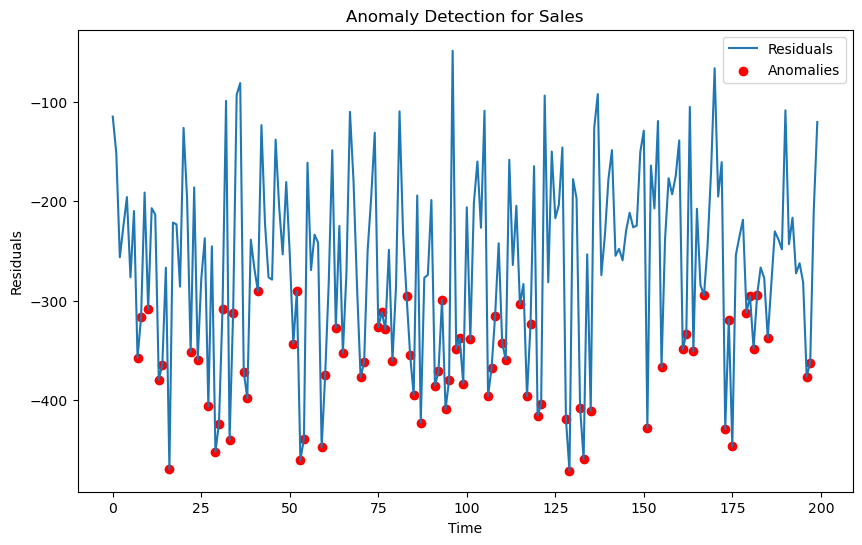

In [29]:
# Visualize Anomalies (for Sales as an example)
import matplotlib.pyplot as plt

time_index = np.arange(len(Y_test))  # Assuming Y_test represents a time series

plt.figure(figsize=(10, 6))
plt.plot(time_index, residuals, label='Residuals')
plt.scatter(time_index[anomalies], residuals[anomalies], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Anomaly Detection for Sales')
plt.legend()
plt.show()
